## Pemodelan prediksi Cool and Warm by Season menggunakan RNN

Data yang digunakan merupakan indeks El Nino La Nina yang dapat diunduh melalui laman : https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

### Import Pustaka

Berikut adalah daftar pustaka yang digunakan dalam pemodelan RNN ini:

In [59]:
# Mengimport Pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.layers import GRU, Dense, Dropout
import itertools
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [60]:
df=pd.read_excel('Data c&w.xlsx')

In [61]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0
74,2024,1.8,1.5,1.1,0.7,0.4,0.2,0.0,-0.1,NaN,NaN,NaN,NaN


### Data Cleaning

In [62]:
df.dropna(inplace=True)

In [63]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0


In [64]:
data = df.set_index('Year', inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1950 to 2023
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJF     74 non-null     float64
 1   JFM     74 non-null     float64
 2   FMA     74 non-null     float64
 3   MAM     74 non-null     float64
 4   AMJ     74 non-null     float64
 5   MJJ     74 non-null     float64
 6   JJA     74 non-null     float64
 7   JAS     74 non-null     float64
 8   ASO     74 non-null     float64
 9   SON     74 non-null     float64
 10  OND     74 non-null     float64
 11  NDJ     74 non-null     float64
dtypes: float64(12)
memory usage: 7.5 KB


### Eksplorasi Data

### Normalisasi Data

In [66]:
years = np.arange(2000, 2030, 0.03)  # Generate years from 2000 to 2029
data = np.sin(np.linspace(0, 100, len(years))) + np.random.normal(0, 0.1, len(years))

In [67]:
data1 = np.array([df])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.reshape(-1, 1))

In [68]:
# Membuat Sequence Data
def create_sequences(data1, seq_length):
    X, y = [], []
    for i in range(len(data1) - seq_length):
        X.append(data1[i:(i + seq_length)])
        y.append(data1[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Panjang sequence
X, y = create_sequences(scaled_data, seq_length)

In [69]:
# Splitt data training dan testing, 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 90:10
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)
# 70:30
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

##### Pendefinisian Model RNN

In [70]:
model = Sequential()

# GRU layers with Dropout regularisation
model.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))

model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))

model.add(GRU(units=50, 
                     activation='tanh'))

# The output layer
model.add(Dense(units=1,
                       activation='relu'))

In [71]:
# Compile model
model.compile(optimizer='adam', loss='mse')

In [72]:
# Training model 80:20
model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
20/20 [==============================] - 17s 145ms/step - loss: 0.0567 - val_loss: 0.0369
Epoch 2/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0209 - val_loss: 0.0286
Epoch 3/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0181 - val_loss: 0.0232
Epoch 4/100
20/20 [==============================] - 0s 25ms/step - loss: 0.0147 - val_loss: 0.0162
Epoch 5/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0101 - val_loss: 0.0079
Epoch 6/100
20/20 [==============================] - 1s 44ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 8/100
20/20 [==============================] - 1s 26ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 9/100
20/20 [==============================] - 0s 21ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 10/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0043 - val_loss: 0.00

In [73]:
# Training model 90:10
model.fit(X_train2, y_train2, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 24ms/step - loss: 8.6968e-04 - val_loss: 7.1138e-04
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 9.9647e-04 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 9.6616e-04 - val_loss: 8.6597e-04
Epoch 4/100
23/23 [==============================] - 1s 21ms/step - loss: 9.7164e-04 - val_loss: 7.5095e-04
Epoch 5/100
23/23 [==============================] - 0s 20ms/step - loss: 8.9530e-04 - val_loss: 8.2696e-04
Epoch 6/100
23/23 [==============================] - 0s 21ms/step - loss: 9.1045e-04 - val_loss: 7.7534e-04
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0010 - val_loss: 6.6690e-04
Epoch 8/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0011 - val_loss: 7.3538e-04
Epoch 9/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0010 - val_loss: 8.1710e-04
Epoch 10/100
23/23 [========================

In [74]:
# Training model 70:30
model.fit(X_train3, y_train3, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 8.6643e-04 - val_loss: 6.4339e-04
Epoch 2/100
18/18 [==============================] - 1s 29ms/step - loss: 8.4455e-04 - val_loss: 7.4815e-04
Epoch 3/100
18/18 [==============================] - 1s 41ms/step - loss: 9.0850e-04 - val_loss: 0.0011
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 8.4400e-04 - val_loss: 6.2340e-04
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 8.4429e-04 - val_loss: 7.0742e-04
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 9.2950e-04 - val_loss: 6.8664e-04
Epoch 7/100
18/18 [==============================] - 0s 22ms/step - loss: 8.0219e-04 - val_loss: 6.6127e-04
Epoch 8/100
18/18 [==============================] - 0s 21ms/step - loss: 7.9938e-04 - val_loss: 7.9711e-04
Epoch 9/100
18/18 [==============================] - 0s 21ms/step - loss: 9.4514e-04 - val_loss: 9.8638e-04
Epoch 10/100
18/18 [============

##### Evaluasi Data Training dan Data Testing

In [75]:
# Evaluasi model 80:20
train_score1 = model.evaluate(X_train, y_train)
test_score1 = model.evaluate(X_test, y_test)
print(f'MSE Data Training: {train_score1}')
print(f'MSE Data Testing: {test_score1}')

6/6 [==============================] - 0s 10ms/step - loss: 6.7919e-04
MSE Data Training: 0.0006685362313874066
MSE Data Testing: 0.0006791901541873813


In [76]:
# Evaluasi model 90:10
train_score2 = model.evaluate(X_train2, y_train2)
test_score2 = model.evaluate(X_test2, y_test2)
print(f'MSE Data Training 2: {train_score2}')
print(f'MSE Data Testing 2: {test_score2}')

3/3 [==============================] - 0s 16ms/step - loss: 7.0321e-04
MSE Data Training 2: 0.0006670471047982574
MSE Data Testing 2: 0.0007032128632999957


In [77]:
# Evaluasi model 70:30
train_score3 = model.evaluate(X_train3, y_train3)
test_score3 = model.evaluate(X_test3, y_test3)
print(f'MSE Data Training 3: {train_score3}')
print(f'MSE Data Testing 3: {test_score3}')

9/9 [==============================] - 0s 12ms/step - loss: 7.0450e-04
MSE Data Training 3: 0.0006561279878951609
MSE Data Testing 3: 0.0007044973899610341


##### Prediksi model

In [78]:
# 80:20
predictions1 = model.predict(X_test)
# 90:10
predictions2 = model.predict(X_test2)
#70:30
predictions3 = model.predict(X_test3)

9/9 [==============================] - 0s 6ms/step


In [79]:
# 80:20
predictions1 = scaler.inverse_transform(predictions1)
y_test_actual1 = scaler.inverse_transform(y_test)
# 90:10
predictions2 = scaler.inverse_transform(predictions2)
y_test_actual2 = scaler.inverse_transform(y_test2)
# 70:30
predictions3 = scaler.inverse_transform(predictions3)
y_test_actual3 = scaler.inverse_transform(y_test3)

##### Evaluasi model prediksi

In [80]:
r_squared1 = r2_score(y_test_actual1, predictions1)
r_squared2 = r2_score(y_test_actual2, predictions2)
r_squared3 = r2_score(y_test_actual3, predictions3)
print(f'R-squared model 1: {r_squared1}')
print(f'R-squared model 2: {r_squared2}')
print(f'R-squared model 3: {r_squared3}')

R-squared model 1: 0.9792997670721768
R-squared model 2: 0.9737788050335304
R-squared model 3: 0.9771937055921578


##### Visualisasi Model

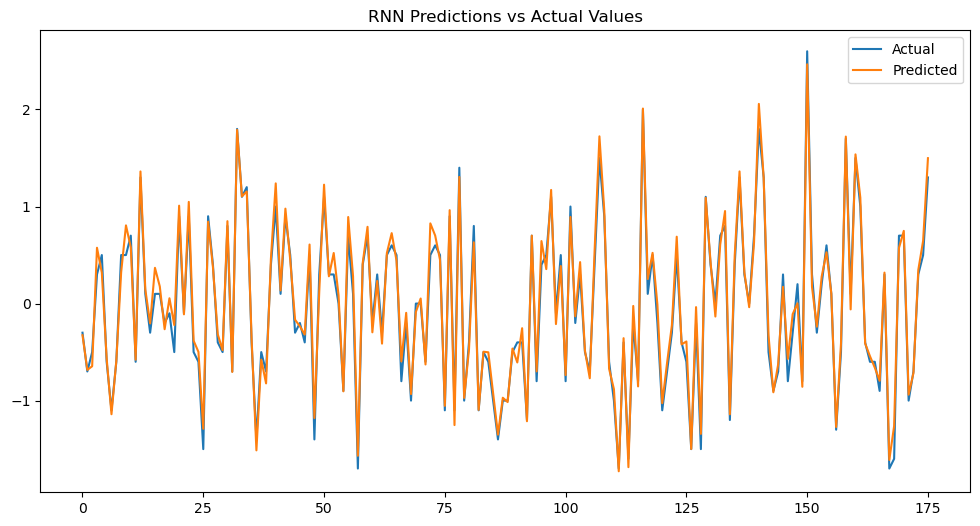

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual1, label='Actual')
plt.plot(predictions1, label='Predicted')
plt.legend()
plt.title('RNN Predictions vs Actual Values')
plt.show()

## Kesimpulan

- Pemodelan prediksi telah dilakukan menggunakn GRU RNN, pemodelan tersebut dilakukan dengan menggunakan beberapa perbandingan data training dan data testing yaitu 90:10, 80:20, 70:30. 
- Pemodelan prediksi menggunakan GRU RNN yang memiliki R2 Score paling baik adalah pada dataset dengan 80% data training dan 20% data testing yaitu sebesar 0.9792997670721768. R2 score mendekati nilai 1 menunjukkan bahwa model tersebut dapat digunakan untuk memprediksi data time series.
